Warning message in lapply(y, as.numeric):
"NAs introduced by coercion"

num.dies,P.bat,P.pv.curt,f.min
12,-2200000,7e+06,49.15287
4,-2200000,6e+06,48.53229
5,-2200000,6e+06,48.33673
6,-2200000,6e+06,48.40123
7,-2200000,6e+06,48.68405
8,-2200000,6e+06,48.89234
9,-2200000,6e+06,49.03404
10,-2200000,6e+06,49.14692
11,-2200000,6e+06,49.23873
12,-2200000,6e+06,49.31570


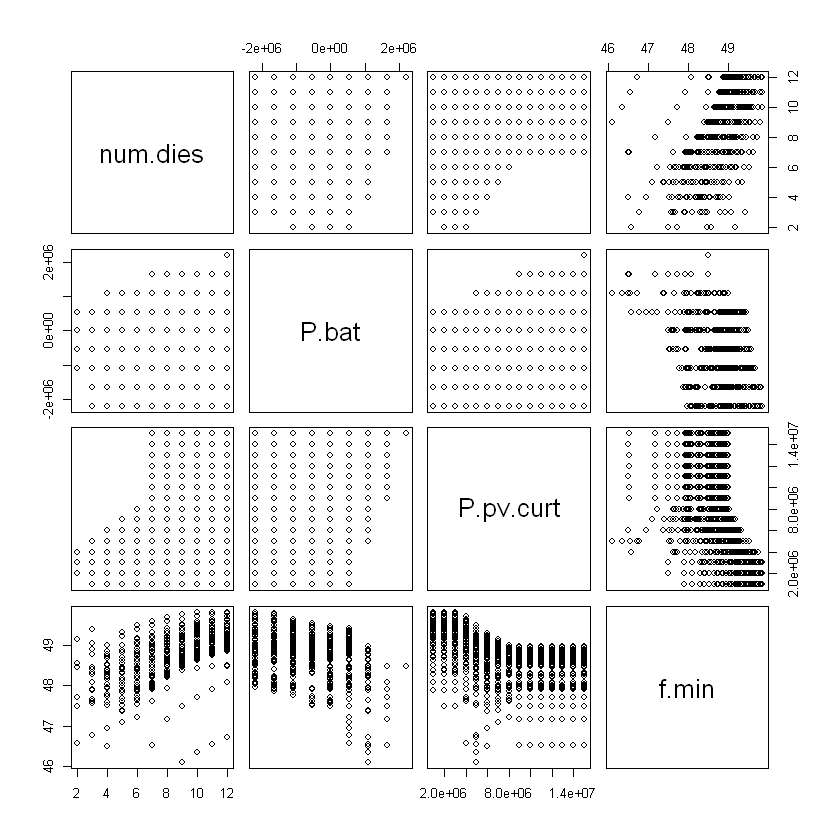

In [9]:
rm(list=ls())

require(R.matlab)

# Reading data 
data <- readMat(con = '../../Data/Generated Data/4 - Frequency/result_sim.mat')
data <- readMat(con = '../../Data/Generated Data/4 - Frequency/result_sim - Copy.mat')
# t() - transpose matrix
X <- t(data.frame(data[[1]],stringsAsFactors = F)) 
X <- as.data.frame(X,row.names = T)
y <- (lapply(X,unlist))
z <- lapply(y,as.numeric)
j <- matrix(unlist(z), ncol = length(z), byrow = F)
cols <- c(2,3,4,6)
k <- j[,cols]
colnames(k) <- names(X[,cols])
k[57:69,]

# comportament de la variable freq vs variables

# windows()
pairs(j[,cols], labels =  names(X[,cols]))
pairs(j[,cols], labels =  colnames(k))

In [10]:
# linear model without transformations

fit <- lm(f.min ~ num.dies + P.bat + P.pv.curt, data=data.frame(k))
summary(fit) # show results



Call:
lm(formula = f.min ~ num.dies + P.bat + P.pv.curt, data = data.frame(k))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.53826 -0.16391  0.03262  0.23197  1.09430 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.788e+01  4.689e-02 1021.05   <2e-16 ***
num.dies     1.545e-01  5.336e-03   28.96   <2e-16 ***
P.bat       -1.999e-07  1.127e-08  -17.73   <2e-16 ***
P.pv.curt   -8.570e-08  3.168e-09  -27.05   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3596 on 801 degrees of freedom
Multiple R-squared:  0.6756,	Adjusted R-squared:  0.6744 
F-statistic:   556 on 3 and 801 DF,  p-value: < 2.2e-16


In [28]:
matrix(fit$coefficients)

theta_i = matrix(fit$coefficients)[1];
theta_d = matrix(fit$coefficients)[2];
theta_b = matrix(fit$coefficients)[3];
theta_p = matrix(fit$coefficients)[4];

writeMat(theta_i = theta_i, theta_d = theta_d, theta_b = theta_b, theta_p = theta_p, con="../../Data/Generated Data/4 - Frequency/theta.mat")


4.764003e+01
1.443432e-01
-1.296222e-07
-4.843416e-09
